# Ensemble Averaging in Medical Signal Processing

Dealing with data as a researcher, a data scientist/analyst,  or even in any science field is inevitable. Thus, the reliability of the data you're working with is crucial as it decides the reliability of your work.

In this notebook, we will introduce the ensemble averaging method, a simple but powerful method, and its applications on signal data.

## Background
The average is a single value that can describe a set of values. It can be defined as the sum of the variables divided by the number of variables. If we have a set of variables {x1, x2, …, xn}, the average can be calculated as follows:

$$\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$$

A simple example you can think of to introduce the idea of ensemble averaging is measuring the temperature of a solution that has a stable temperature during the measurement. An electronic sensor can be used to measure the temperature three times for a time of ten seconds. the ensemble averaging can be done by taking the average of the three measurements.

From the example above, the ensemble averaging method requires the ability to repeat the experiment you are conducting with the same properties of the measurement system [[**1**]](https://doi.org/10.1016/B978-0-12-809395-5). This is hard to be applied in many real-world cases. Therefore, a solution that might be considered in many cases is conducting the experiment one time but using multiple sensors [[**1**]](https://doi.org/10.1016/B978-0-12-809395-5) simultaneously to produce multiple observations of the corresponding experiment.

In the case of the signal type of data (time series), the ensemble averaging method is done by averaging the samples of the signals point-by-point [[**2**]](https://www.ijarcce.com/upload/2016/august-16/IJARCCE%2052.pdf). Therefore, a prerequisite before  applying the method is that the signals generated are aligned in time [[**1**]](https://doi.org/10.1016/B978-0-12-809395-5). Below is an illustration of applying ensemble averaging on signal data.

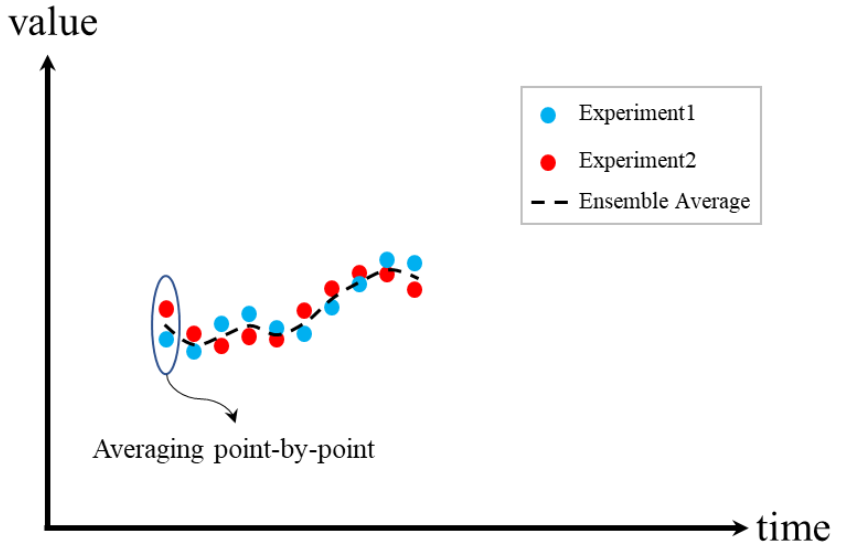

## Why use the ensemble averaging method?
- Ensemble averaging is useful for filtering random noise in the signals [[**2**]](https://www.ijarcce.com/upload/2016/august-16/IJARCCE%2052.pdf).
- Applying the ensemble averaging method improves the Signal to Noise Ratio (SNR). If we have N number of repetitions, the improvement is proportional to the square root of N [[**2**]](https://www.ijarcce.com/upload/2016/august-16/IJARCCE%2052.pdf).

## Real-world Medical Example
The applications of the ensemble averaging method are limitless. A great example in the medical field is the idea behind Visual Evoked Response/Potential test (VER or VEP test). The aim of this test is to measure the response to visual stimulation which is produced as electrical signals in the visual cortex of the brain. The test depends on the repetitive stimulation with specified timing [[**3**]](https://eyewiki.aao.org/Visual_Evoked_Potential/_Response_(VEP/VER)). The visual stimulation is done using a screen black-white checkerboard [[**3**]](https://eyewiki.aao.org/Visual_Evoked_Potential/_Response_(VEP/VER)). The repetitive stimuli's signals are averaged point-by-point (ensemble average) to determine the VER signal [[**1**]](https://doi.org/10.1016/B978-0-12-809395-5), remember that the signals are aligned in time of the stimulation process. The following is an example of how to extract VER signals using the ensemble averaging method.

The signal data we will use are available following this [**link**](https://github.com/Roshni1999/John-Semmlow-Signals-and-Systems-for-Bioengineers-2ed/blob/9c6efc1c68e042212cff45a5fb41902d6699a09e/Chapter1/ver.mat) (MIT Licensed). The data consists of 100 electrical signals recorded at 200 Hz of sampling rate.

## Ensemble Averaging using Python
First, we will import the required Python packages:
- **Numpy**: for array manipulation and arithmetic calculation.
- **Matplotlib**: to visualize the signal data of the VER response.
- **Scipy**: we will use the module scipy.io to read the data file (.MAT file type).

In [8]:
# Import the required packages
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

Now, we read the data file that contains the electrical signals using the scipy.io.loadmat method. The output is a dictionary of the file content. The electrical signals can be found in the item "ver".

In [9]:
# Read a Mat file using scipy.io
mat = io.loadmat('ver.mat')
# Exract the electrical signals
ver = mat['ver']

Let's explore the size of the data we are working with.

In [10]:
# The size of variable "ver"
print(ver.shape)

(100, 500)


This means that we have 100 signals and each one has 500 samples. Applying the ensemble averaging method to this data will average 100 signals and produce one signal with 500 samples.

After extracting the signal data, we will define the sampling rate the generate the time axis of the signals.

In [11]:
# Calculate the sampling rate
sampling_rate = 200.0
# Calculate the duration of the recordings
duration = ver.shape[1]/sampling_rate
# Generate the time axis of the recordings
time_axis = np.arange(0, duration, 1/sampling_rate)

Now that we have the time axis and the signals we are studying, we can visualize some of the signals along the same time axis to see what the single visual response looks like. We will visualize only the first 10 signals.

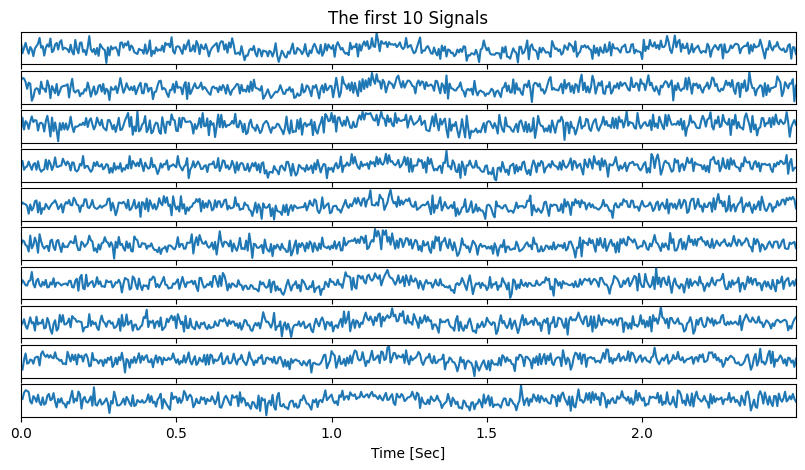

In [12]:
# Subplot figure with 10 rows and one column
fig, axs = plt.subplots(10, figsize=(10,5), sharex=True)

# Plot the first 10 recordings
for i in range(10):
    axs[i].plot(time_axis, ver[i,:])
    # Hide the values of y-axis
    axs[i].set_yticks([])
    # Fit the x-axis along the signal
    axs[i].set_xlim([time_axis[0], time_axis[-1]])

# Set a title and xlabel
axs[0].set_title('The first 10 Signals')
axs[9].set_xlabel('Time [Sec]')
plt.show()

Notice that we cannot recognize the visual response from only one signal. Therefore, we're going to use ensemble averaging to determine the VER.

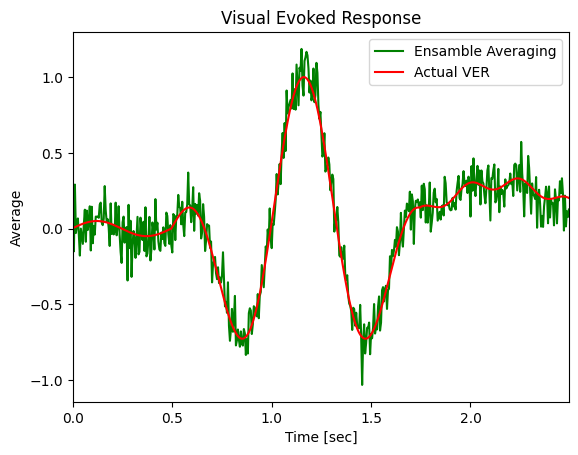

In [13]:
# Apply the ensamble averaging method on the Recordings.
ver_signal = np.mean(ver, axis=0)
# Extract the actual VER from the Mat file
actual_ver = np.reshape(mat['actual_ver'], [500])

# Plot the ensambled EEG recordings and the actual VER
plt.plot(time_axis, ver_signal, color='green', label='Ensamble Averaging')
plt.plot(time_axis, actual_ver, color='red', label='Actual VER')
plt.xlim([time_axis[0], time_axis[-1]])
plt.xlabel('Time [sec]')
plt.ylabel('Average')
plt.title('Visual Evoked Response')
plt.legend()
plt.show()

## Conclusion
- We've introduced a simple yet very helpful method that you can use to extract reliable data.
- The SNR can be improved by the square root of the N (the number of repetitions).
- We've introduced an example using the ensemble averaging method to determine the visual evoked response (VER).

# References
[[**1**]](https://doi.org/10.1016/B978-0-12-809395-5) Semmlow, J. (2018). Signal Analysis in the Time Domain. In Circuits, Signals and Systems for Bioengineers (pp. 51–110). Elsevier. https://doi.org/10.1016/B978-0-12-809395-5.00002-3

[[**2**]](https://www.ijarcce.com/upload/2016/august-16/IJARCCE%2052.pdf) Thomas, T. (2005). Ensemble Averaging Filter for Noise Reduction. International Journal of Advanced Research in Computer and Communication Engineering, 5(8).

[[**3**]](https://eyewiki.aao.org/Visual_Evoked_Potential/_Response_(VEP/VER)) Tripathy, K.,  Hsu, J., & Lim, J. (2022, November 10). Visual Evoked Potential/ Response (VEP/VER). American Academy of Ophthalmology.